# Final Post-Clustering Analysis

This notebook performs a comprehensive analysis of post-clustering results with correct responder definition:
- **Responders**: Participants with recall > 2/3 (0.667)
- **Analysis Focus**: Post-clustering metrics only
- **Metrics**: Recall, FAR (False Alarm Rate), Challenge Score (Sensitivity% - 0.4 * FAR/hour)

## Data Source
Uses the feather file with all clustering results for threshold and strategy analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Configure matplotlib
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the feather data
feather_path = Path('results/final/no-window/test/batch_results/evaluation_results.feather') # Path('results/final/window/test/batch_results_fixed_strategy/evaluation_results.feather')

if not feather_path.exists():
    print(f"Error: Feather file not found at {feather_path}")
    print("Available files in results directory:")
    if Path('results').exists():
        for root, dirs, files in Path('results').walk():
            for file in files:
                if file.endswith('.feather'):
                    print(f"  {root}/{file}")
    else:
        print("  results directory not found")
else:
    # Load the data
    df = pd.read_feather(feather_path)
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")


Data loaded successfully!
Shape: (84, 27)
Columns: ['dataset_id', 'threshold_scale', 'n_samples', 'n_true_anomalies', 'anomaly_percentage', 'has_seizures', 'is_responder_pre', 'is_responder', 'tp_events', 'fn_events', 'fp_events', 'event_recall', 'event_sensitivity', 'event_iou', 'false_alarm_rate_per_hour', 'predicted_samples', 'predicted_percentage', 'processing_timestamp', 'clustering_strategy', 'n_clusters', 'n_representatives', 'cluster_event_recall', 'cluster_event_iou', 'clustered_samples', 'clustered_percentage', 'cluster_event_far_per_hour', 'is_responder_post']


In [3]:
df.columns

Index(['dataset_id', 'threshold_scale', 'n_samples', 'n_true_anomalies',
       'anomaly_percentage', 'has_seizures', 'is_responder_pre',
       'is_responder', 'tp_events', 'fn_events', 'fp_events', 'event_recall',
       'event_sensitivity', 'event_iou', 'false_alarm_rate_per_hour',
       'predicted_samples', 'predicted_percentage', 'processing_timestamp',
       'clustering_strategy', 'n_clusters', 'n_representatives',
       'cluster_event_recall', 'cluster_event_iou', 'clustered_samples',
       'clustered_percentage', 'cluster_event_far_per_hour',
       'is_responder_post'],
      dtype='object')

In [4]:
df.head()

,dataset_id,threshold_scale,n_samples,n_true_anomalies,anomaly_percentage,has_seizures,is_responder_pre,is_responder,tp_events,fn_events,fp_events,event_recall,event_sensitivity,event_iou,false_alarm_rate_per_hour,predicted_samples,predicted_percentage,processing_timestamp,clustering_strategy,n_clusters,n_representatives,cluster_event_recall,cluster_event_iou,clustered_samples,clustered_percentage,cluster_event_far_per_hour,is_responder_post
0,98,0.65,3327360,4704,0.141373,True,True,True,1,0,9952,1.000000,1.000000,0,86.139642,1520674,45.702118,2025-09-10T18:24:36.051287,time_30s,4696,4696,1.000000,0.000213,1966332,59.095860,40.585690,True
1,98,0.70,3327360,4704,0.141373,True,True,True,1,0,4790,1.000000,1.000000,0,41.459896,445887,13.400624,2025-09-10T18:24:37.747709,time_60s,1717,1717,1.000000,0.000583,882329,26.517389,14.826890,True
2,98,0.75,3327360,4704,0.141373,True,True,True,1,0,882,1.000000,1.000000,0,7.634160,60122,1.806898,2025-09-10T18:24:39.165171,time_120s,489,489,1.000000,0.002045,182025,5.470553,4.223889,True
3,99,0.65,3252672,13536,0.416150,True,False,False,2,1,8792,0.666667,0.666667,0,77.846644,1149994,35.355363,2025-09-10T18:24:40.821939,time_30s,4374,4374,0.666667,0.000458,1537727,47.275809,38.666549,False
4,99,0.70,3252672,13536,0.416150,True,False,False,1,2,3197,0.333333,0.333333,0,28.307066,323336,9.940627,2025-09-10T18:24:42.286173,time_60s,1403,1403,0.333333,0.000713,565768,17.393946,12.387108,False


In [5]:
# Group thresholds by their mean percentage metrics
threshold_percentages = (
    df.groupby('threshold_scale')
    .agg({
        'anomaly_percentage': 'mean',
        'predicted_percentage': 'mean', 
        'clustered_percentage': 'mean'
    })
    .round(3)
    .reset_index()
)

print("Mean percentages by threshold:")
threshold_percentages

Mean percentages by threshold:


,threshold_scale,anomaly_percentage,predicted_percentage,clustered_percentage
0,0.65,1.854,46.701,59.887
1,0.70,1.854,13.826,28.148
2,0.75,1.854,1.722,4.740


In [6]:
# Group thresholds by their mean percentage metrics
threshold_percentages = (
    df.groupby('threshold_scale')
    .agg({
        'anomaly_percentage': 'mean',
        'predicted_percentage': 'mean', 
        'clustered_percentage': 'mean'
    })
    .round(3)
    .reset_index()
)

print("Mean percentages by threshold (before filtering):")
print(threshold_percentages)

# Filter out thresholds where predicted percentage > 51%
valid_thresholds_pct = threshold_percentages[threshold_percentages['predicted_percentage'] <= 51]['threshold_scale']
print(f"\nThresholds with predicted percentage <= 51%: {len(valid_thresholds_pct)} out of {len(threshold_percentages)}")

# Filter the main dataframe
df_filtered = df[df['threshold_scale'].isin(valid_thresholds_pct)].copy()
print(f"Filtered dataset shape: {df_filtered.shape} (was {df.shape})")

# Show the filtered threshold percentages
threshold_percentages_filtered = threshold_percentages[threshold_percentages['predicted_percentage'] <= 51]
print("\nFiltered mean percentages by threshold:")
threshold_percentages_filtered

Mean percentages by threshold (before filtering):
   threshold_scale  anomaly_percentage  predicted_percentage  \
0             0.65               1.854                46.701   
1             0.70               1.854                13.826   
2             0.75               1.854                 1.722   

   clustered_percentage  
0                59.887  
1                28.148  
2                 4.740  

Thresholds with predicted percentage <= 51%: 3 out of 3
Filtered dataset shape: (84, 27) (was (84, 27))

Filtered mean percentages by threshold:


,threshold_scale,anomaly_percentage,predicted_percentage,clustered_percentage
0,0.65,1.854,46.701,59.887
1,0.70,1.854,13.826,28.148
2,0.75,1.854,1.722,4.740


In [7]:
unique_ids = df['dataset_id'].unique()
unique_ids

array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125])

ndex(['dataset_id', 'threshold_scale', 'n_samples', 'n_true_anomalies',
       'anomaly_percentage', 'has_seizures', 'is_responder_pre',
       'is_responder', 'tp_events', 'fn_events', 'fp_events', 'event_recall',
       'event_sensitivity', 'event_iou', 'false_alarm_rate_per_hour',
       'predicted_samples', 'predicted_percentage', 'processing_timestamp',
       'clustering_strategy', 'n_clusters', 'n_representatives',
       'cluster_event_recall', 'cluster_event_iou', 'clustered_samples',
       'clustered_percentage', 'cluster_event_far_per_hour',
       'is_responder_post'],
      dtype='object')

In [22]:
small_df = df_filtered[['threshold_scale', 'event_recall',
       'false_alarm_rate_per_hour',  'clustering_strategy', 'cluster_event_recall', 'cluster_event_far_per_hour','is_responder_post']].copy()
small_df.head(10)

,threshold_scale,event_recall,false_alarm_rate_per_hour,clustering_strategy,cluster_event_recall,cluster_event_far_per_hour,is_responder_post
0,0.65,1.000000,86.139642,time_30s,1.000000,40.585690,True
1,0.70,1.000000,41.459896,time_60s,1.000000,14.826890,True
2,0.75,1.000000,7.634160,time_120s,1.000000,4.223889,True
3,0.65,0.666667,77.846644,time_30s,0.666667,38.666549,False
4,0.70,0.333333,28.307066,time_60s,0.333333,12.387108,False
5,0.75,0.333333,6.463609,time_120s,0.333333,3.276076,False
6,0.65,1.000000,80.266148,time_30s,1.000000,34.691986,True
7,0.70,1.000000,36.629785,time_60s,1.000000,12.532895,True
8,0.75,1.000000,6.342703,time_120s,1.000000,3.696172,True
9,0.65,1.000000,77.579240,time_30s,1.000000,39.853641,True


In [23]:
# Total number of unique subjects in the dataset
n_subjects = len(unique_ids)

# Count per threshold + strategy
counts = (
    small_df
    .groupby(['threshold_scale', 'clustering_strategy'])
    .size()
    .reset_index(name='count')
)

# Compute total rows per threshold
totals = counts.groupby('threshold_scale')['count'].sum().reset_index(name='total_count')

# Identify valid thresholds (those with complete subject count)
valid_thresholds = totals.loc[totals['total_count'] == n_subjects, 'threshold_scale']

# Filter both counts and small_df
counts = counts.merge(totals, on='threshold_scale')
counts = counts[counts['threshold_scale'].isin(valid_thresholds)].copy()

# Add percentages
counts['percentage'] = (
    counts.groupby('threshold_scale')['count']
          .transform(lambda x: 100 * x / x.sum())
)

# Drop helper column
counts = counts.drop(columns='total_count')

# Filter small_df as well
small_df = small_df[small_df['threshold_scale'].isin(valid_thresholds)].copy()
counts

,threshold_scale,clustering_strategy,count,percentage
0,0.65,time_30s,28,100.0
1,0.70,time_60s,28,100.0
2,0.75,time_120s,28,100.0


In [24]:
# Find the most used strategy per threshold
most_used_strategy = (
    counts
    .loc[counts.groupby('threshold_scale')['count'].idxmax()]
    .reset_index(drop=True)
    [['threshold_scale', 'clustering_strategy', 'count', 'percentage']]
    .sort_values('threshold_scale')
)

print("Most used strategy per threshold:")
most_used_strategy

Most used strategy per threshold:


,threshold_scale,clustering_strategy,count,percentage
0,0.65,time_30s,28,100.0
1,0.70,time_60s,28,100.0
2,0.75,time_120s,28,100.0


In [ ]:
import json

# Convert the most_used_strategy DataFrame to the required JSON format
strategies_dict = {
    "strategies": {}
}

for _, row in most_used_strategy.iterrows():
    # Convert threshold to string (as required by the JSON format)
    threshold_str = str(row['threshold_scale'])
    strategy_name = row['clustering_strategy']
    strategies_dict["strategies"][threshold_str] = strategy_name

# Save to JSON file
json_path = 'results/final/no-window/test/batch_results/fixed_strategy_config.json'
with open(json_path, 'w') as f:
    json.dump(strategies_dict, f, indent=2)

print(f"Fixed strategy configuration saved to: {json_path}")
print("Contents:")
print(json.dumps(strategies_dict, indent=2))

Fixed strategy configuration saved to: results/final/window/test/batch_results/fixed_strategy_config.json
Contents:
{
  "strategies": {
    "0.65": "time_30s",
    "0.7": "time_60s",
    "0.75": "time_120s"
  }
}


In [30]:
import pandas as pd

# Add score (copy to avoid SettingWithCopy warnings if desired)
small_df = small_df.copy()
small_df['score'] = small_df['cluster_event_recall'] * 100 - 0.4 * small_df['cluster_event_far_per_hour']

# 1) Per-threshold x responder-flag
by_flag = (
    small_df
    .groupby(['threshold_scale', 'is_responder_post'])
    .agg(
        mean_recall=('cluster_event_recall', 'mean'),
        mean_far=('cluster_event_far_per_hour', 'mean'),
        mean_score=('score', 'mean'),
        count=('is_responder_post', 'size')
    )
    .reset_index()
)
by_flag['mean_recall'] = by_flag['mean_recall'] * 100
by_flag['is_responder_post'] = by_flag['is_responder_post'].map({True: 'responders', False: 'non_responders'})

# 2) True overall per-threshold (“all” = responders + non_responders)
overall = (
    small_df
    .groupby('threshold_scale')
    .agg(
        mean_recall=('cluster_event_recall', 'mean'),
        mean_far=('cluster_event_far_per_hour', 'mean'),
        mean_score=('score', 'mean'),
        count=('is_responder_post', 'size')
    )
    .reset_index()
)
overall['mean_recall'] = overall['mean_recall'] * 100
overall['is_responder_post'] = 'all'

# 3) Combine and pivot
summary = pd.concat([by_flag, overall], ignore_index=True)

table = summary.pivot(
    index='threshold_scale',
    columns='is_responder_post',
    values=['mean_recall', 'mean_far', 'mean_score', 'count']
)

# Flatten columns
table.columns = [f"{metric}_{group}" for metric, group in table.columns]
table = table.reset_index()

# 4) Responder ratio = responders / all
table['responder_ratio'] = table['count_responders'] / table['count_all']

# (Optional) drop raw counts if you don’t need them
table = table.drop(columns=[c for c in table.columns if c.startswith('count_')])

table

,threshold_scale,mean_recall_all,mean_recall_non_responders,mean_recall_responders,mean_far_all,mean_far_non_responders,mean_far_responders,mean_score_all,mean_score_non_responders,mean_score_responders,responder_ratio
0,0.65,98.809524,66.666667,100.000000,39.637024,38.666549,39.672968,82.954714,51.200047,84.130813,0.964286
1,0.70,94.047619,44.444444,100.000000,15.249330,14.084961,15.389055,87.947887,38.810460,93.844378,0.892857
2,0.75,62.875180,46.111111,85.227273,4.247795,4.055354,4.504384,61.176062,44.488970,83.425519,0.428571


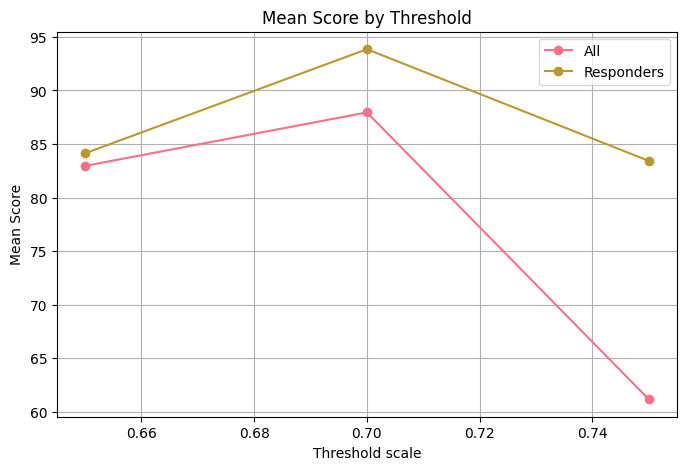

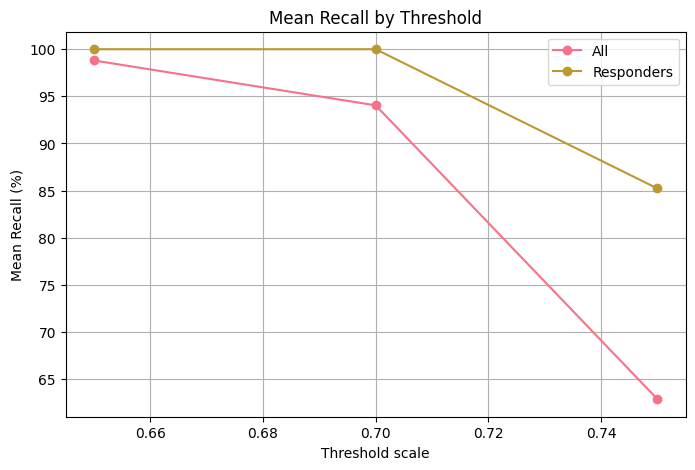

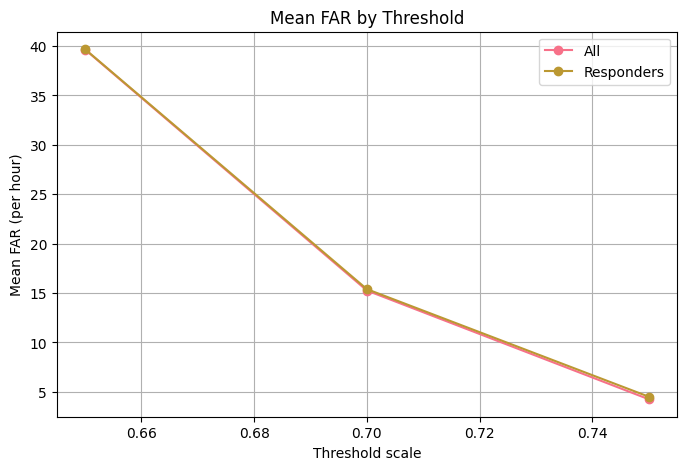

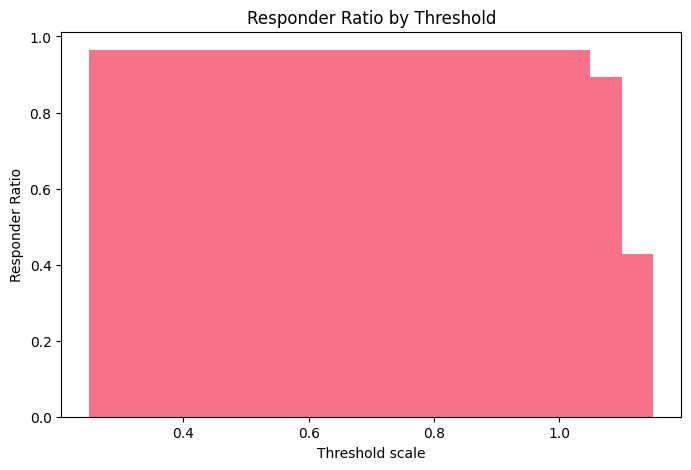

                   criterion  best_threshold
0             best_score_all            0.70
1      best_score_responders            0.70
2         highest_recall_all            0.65
3  highest_recall_responders            0.65
4             lowest_far_all            0.75
5      lowest_far_responders            0.75
6    highest_responder_ratio            0.65


In [31]:
# ---- Visualizations ----
plt.figure(figsize=(8,5))
plt.plot(table['threshold_scale'], table['mean_score_all'], marker='o', label='All')
plt.plot(table['threshold_scale'], table['mean_score_responders'], marker='o', label='Responders')
plt.xlabel("Threshold scale"); plt.ylabel("Mean Score")
plt.title("Mean Score by Threshold"); plt.legend(); plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(table['threshold_scale'], table['mean_recall_all'], marker='o', label='All')
plt.plot(table['threshold_scale'], table['mean_recall_responders'], marker='o', label='Responders')
plt.xlabel("Threshold scale"); plt.ylabel("Mean Recall (%)")
plt.title("Mean Recall by Threshold"); plt.legend(); plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(table['threshold_scale'], table['mean_far_all'], marker='o', label='All')
plt.plot(table['threshold_scale'], table['mean_far_responders'], marker='o', label='Responders')
plt.xlabel("Threshold scale"); plt.ylabel("Mean FAR (per hour)")
plt.title("Mean FAR by Threshold"); plt.legend(); plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.bar(table['threshold_scale'], table['responder_ratio'])
plt.xlabel("Threshold scale"); plt.ylabel("Responder Ratio")
plt.title("Responder Ratio by Threshold")
plt.show()

# ---- Analysis of best thresholds ----
analysis = {
    "best_score_all": table.loc[table['mean_score_all'].idxmax(), 'threshold_scale'],
    "best_score_responders": table.loc[table['mean_score_responders'].idxmax(), 'threshold_scale'],
    "highest_recall_all": table.loc[table['mean_recall_all'].idxmax(), 'threshold_scale'],
    "highest_recall_responders": table.loc[table['mean_recall_responders'].idxmax(), 'threshold_scale'],
    "lowest_far_all": table.loc[table['mean_far_all'].idxmin(), 'threshold_scale'],
    "lowest_far_responders": table.loc[table['mean_far_responders'].idxmin(), 'threshold_scale'],
    "highest_responder_ratio": table.loc[table['responder_ratio'].idxmax(), 'threshold_scale'],
}

analysis_df = pd.DataFrame(list(analysis.items()), columns=["criterion", "best_threshold"])
print(analysis_df)

In [32]:
def threshold_metrics(df, threshold):
    """
    Compute mean Recall, FAR, Score for responders and all,
    plus responder ratio, for a given threshold.

    Parameters
    ----------
    df : pd.DataFrame
        Must contain: threshold_scale, cluster_event_recall, 
        cluster_event_far_per_hour, is_responder_post
    threshold : value
        The threshold_scale to filter on

    Returns
    -------
    dict
        Dictionary with metrics for responders, all, and responder ratio
    """
    # Filter for threshold
    sub = df[df['threshold_scale'] == threshold].copy()
    if sub.empty:
        raise ValueError(f"No data for threshold {threshold}")

    # Compute score per row
    sub['score'] = sub['cluster_event_recall'] * 100 - 0.4 * sub['cluster_event_far_per_hour']

    # --- Responders only ---
    resp = sub[sub['is_responder_post'] == True]
    resp_recall = resp['cluster_event_recall'].mean() * 100 if not resp.empty else float('nan')
    resp_far = resp['cluster_event_far_per_hour'].mean() if not resp.empty else float('nan')
    resp_score = resp['score'].mean() if not resp.empty else float('nan')

    # --- All (responders + non-responders) ---
    all_recall = sub['cluster_event_recall'].mean() * 100
    all_far = sub['cluster_event_far_per_hour'].mean()
    all_score = sub['score'].mean()

    # --- Responder ratio ---
    responder_ratio = sub['is_responder_post'].mean()

    return {
        "responders": {
            "mean_recall": resp_recall,
            "mean_far": resp_far,
            "mean_score": resp_score,
        },
        "all": {
            "mean_recall": all_recall,
            "mean_far": all_far,
            "mean_score": all_score,
        },
        "responder_ratio": responder_ratio
    }

In [33]:
# metrics = threshold_metrics(small_df, threshold=0.2)
# metrics

In [34]:
rows = []
for _, row in analysis_df.iterrows():
    crit = row['criterion']
    thr = row['best_threshold']
    m = threshold_metrics(small_df, thr)
    rows.append({
        "criterion": crit,
        "threshold_scale": thr,
        "mean_recall_responders": m["responders"]["mean_recall"],
        "mean_far_responders": m["responders"]["mean_far"],
        "mean_score_responders": m["responders"]["mean_score"],
        "mean_recall_all": m["all"]["mean_recall"],
        "mean_far_all": m["all"]["mean_far"],
        "mean_score_all": m["all"]["mean_score"],
        "responder_ratio": m["responder_ratio"]
    })

metrics_table = pd.DataFrame(rows).round(3)

display(metrics_table)

,criterion,threshold_scale,mean_recall_responders,mean_far_responders,mean_score_responders,mean_recall_all,mean_far_all,mean_score_all,responder_ratio
0,best_score_all,0.70,100.000,15.389,93.844,94.048,15.249,87.948,0.893
1,best_score_responders,0.70,100.000,15.389,93.844,94.048,15.249,87.948,0.893
2,highest_recall_all,0.65,100.000,39.673,84.131,98.810,39.637,82.955,0.964
3,highest_recall_responders,0.65,100.000,39.673,84.131,98.810,39.637,82.955,0.964
4,lowest_far_all,0.75,85.227,4.504,83.426,62.875,4.248,61.176,0.429
5,lowest_far_responders,0.75,85.227,4.504,83.426,62.875,4.248,61.176,0.429
6,highest_responder_ratio,0.65,100.000,39.673,84.131,98.810,39.637,82.955,0.964


In [ ]:
metrics_table.to_feather('results/final/no-window/test/batch_results_fixed_strategy/summary_metrics_table.feather') 

NameError: name 'metrics_table' is not defined

In [18]:
unique_thresholds = metrics_table['threshold_scale'].unique()
unique_thresholds.sort()
unique_thresholds

NameError: name 'metrics_table' is not defined

In [19]:
import pandas as pd

# Build the grouped (MultiIndex) table from your existing flat metrics_table
def to_grouped_table(analysis_df, small_df):
    def threshold_metrics(df, threshold):
        sub = df[df['threshold_scale'] == threshold].copy()
        if sub.empty:
            raise ValueError(f"No data for threshold {threshold}")
        sub['score'] = sub['cluster_event_recall'] * 100 - 0.4 * sub['cluster_event_far_per_hour']

        # responders
        resp = sub[sub['is_responder_post'] == True]
        resp_recall = resp['cluster_event_recall'].mean() * 100 if not resp.empty else float('nan')
        resp_far = resp['cluster_event_far_per_hour'].mean() if not resp.empty else float('nan')
        resp_score = resp['score'].mean() if not resp.empty else float('nan')

        # all (responders + non-responders)
        all_recall = sub['cluster_event_recall'].mean() * 100
        all_far = sub['cluster_event_far_per_hour'].mean()
        all_score = sub['score'].mean()

        # responder ratio
        responder_ratio = sub['is_responder_post'].mean()

        return {
            "responders": {"mean_recall": resp_recall, "mean_far": resp_far, "mean_score": resp_score},
            "all": {"mean_recall": all_recall, "mean_far": all_far, "mean_score": all_score},
            "responder_ratio": responder_ratio
        }

    rows = []
    for _, r in analysis_df.iterrows():
        crit = r['criterion']
        thr  = r['best_threshold']
        m = threshold_metrics(small_df, thr)
        rows.append([
            crit, thr,
            m["responders"]["mean_recall"], m["responders"]["mean_far"], m["responders"]["mean_score"],
            m["all"]["mean_recall"],        m["all"]["mean_far"],        m["all"]["mean_score"],
            m["responder_ratio"]
        ])

    df = pd.DataFrame(rows, columns=[
        ("", "criterion"),
        ("", "threshold_scale"),
        ("Responders", "mean_recall"),
        ("Responders", "mean_far"),
        ("Responders", "mean_score"),
        ("All", "mean_recall"),
        ("All", "mean_far"),
        ("All", "mean_score"),
        ("", "responder_ratio"),
    ])
    df.columns = pd.MultiIndex.from_tuples(df.columns)

    # Proper rounding using IndexSlice (specify BOTH top-level headers)
    idx = pd.IndexSlice
    metric_cols = (['Responders', 'All'], ['mean_recall', 'mean_far', 'mean_score'])
    df.loc[:, idx[metric_cols[0], metric_cols[1]]] = (
        df.loc[:, idx[metric_cols[0], metric_cols[1]]].round(3)
    )
    df.loc[:, idx['', 'responder_ratio']] = df.loc[:, idx['', 'responder_ratio']].round(3)

    return df

grouped_metrics_table = to_grouped_table(analysis_df, small_df)
grouped_metrics_table

NameError: name 'analysis_df' is not defined

In [20]:
(grouped_metrics_table
 .style
 .format(precision=3, na_rep="–")
 .set_caption("Best Thresholds per Criterion — Responders vs All")
)

NameError: name 'grouped_metrics_table' is not defined

In [21]:
# Pick colors for the column groups
header_colors = {
    "Responders": "background-color: #d1e7dd;",  # light green
    "All": "background-color: #cfe2ff;",         # light blue
}

def color_top_level(val):
    if val in header_colors:
        return header_colors[val]
    return ""

styled = (
    grouped_metrics_table
    .style
    .format(precision=3, na_rep="–")
    .set_caption("Best Thresholds per Criterion — Responders vs All")
    .set_table_styles(
        # Apply colors to top-level headers
        [{ "selector": f"th.col{i}.level0", "props": header_colors.get(lbl, "") }
         for i, lbl in enumerate(grouped_metrics_table.columns.get_level_values(0))]
    )
)
styled

NameError: name 'grouped_metrics_table' is not defined